In [1]:
import csv
import numpy as np

In [2]:
price_list = list()

with open('Google.csv','r') as f:
        for row in csv.reader(f,delimiter=","):
                price_list.append(row)

In [3]:
data = np.array(price_list)[1:,1:]
date = np.array(price_list)[1:,0]
data = np.float32(data)

In [4]:
split_r = 0.2

train_X = data[:-round(len(data)*split_r)-1]
train_y = data[1:-round(len(data)*split_r), 3].reshape(-1,1)

test_X = data[-round(len(data)*split_r)-1:-1] #1074-1341
test_y = data[-round(len(data)*split_r):, 3].reshape(-1,1)

date = date[-round(len(data)*split_r):]

In [5]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()
reg.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
test_y_pred = reg.predict(test_X)
print("coefficients:/n",reg.coef_)
print("Corelation: %.3f" % r2_score(test_y,test_y_pred))
from sklearn import preprocessing 
from matplotlib import pyplot as plt

coefficients:/n [[-0.16919559  0.2563929   0.32346663  0.5856012   0.00247467 -0.05221788
   0.         -0.21650821  0.00413689  0.04184384  0.17477414 -0.00247469]]
Corelation: 0.991


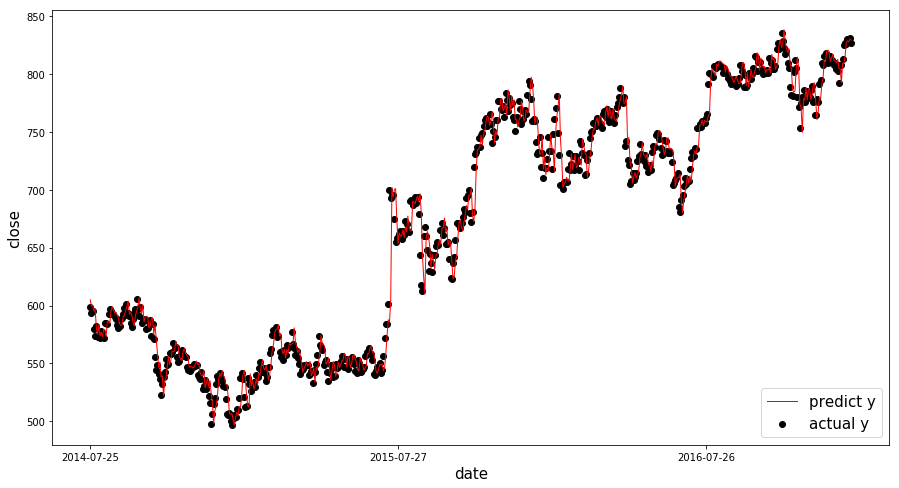

In [7]:
plt.figure(figsize=(15,8))
plt.scatter(range(len(test_y)-1), test_y[1:],  color='black',label='actual y', linewidth=1)
plt.plot(range(len(test_y)-1), test_y_pred[:-1], color='red',label='predict y', linewidth=1)
plt.legend(loc='lower right',prop={'size': 15})
plt.ylabel('close',fontsize=15)
plt.xlabel('date',fontsize=15)
plt.xticks(range(len(test_y)-1)[::252], date[::252])
plt.show()
plt.close()

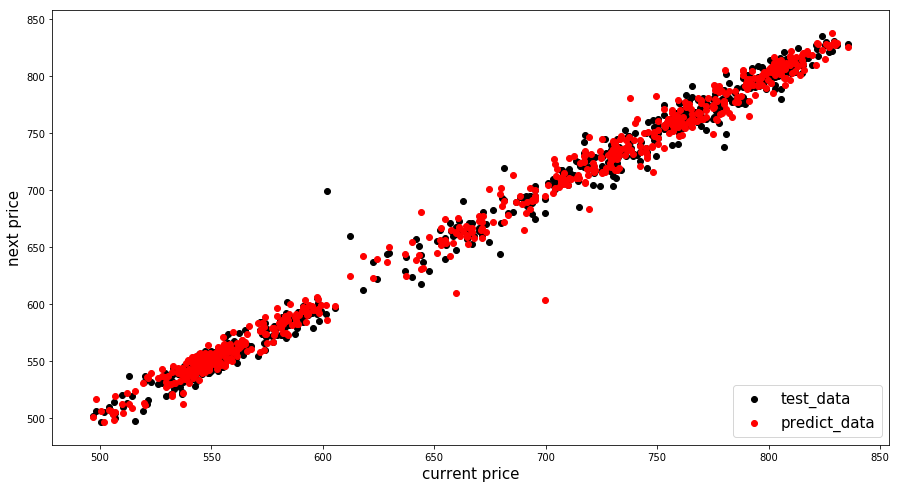

In [10]:
plt.figure(figsize=(15,8))
plt.scatter(test_y[:-1], test_y[1:],  color='black',label='test_data')
plt.scatter(test_y[:-1], test_y_pred[:-1], color='red',label='predict_data')
plt.legend(loc='lower right',prop={'size': 15})
plt.ylabel('next price',fontsize=15)
plt.xlabel('current price',fontsize=15)
plt.show()
plt.close()